# Simulated IRT Data Generation
To test our non-parametric IRT model, we generate items with a parameteric form and sample student abilities from the standard prior distributions assumed in IRT literature, because these at least have some history/credibility as model data.

In [4]:
# Simulate MCMC model data: pick the true parameter variables from the model's prior distribution.
#import cluster.cntree.cntree as cntree
import collections
import logging
import matplotlib.pyplot as plt
import numpy as np
import tc.simulate_data

%load_ext autoreload
%autoreload 2

level = logging.INFO
for handler in logging.root.handlers[:]: logging.root.removeHandler(handler)
logging.basicConfig(level=level, format="%(levelname)-8s %(message)s", datefmt="%a, %d %b %Y %H:%M:%S")

# Deterministic results.
np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Number of persons.
P = 1000
# Number of items.
I = 20
# Number of latent ability dimensions (sub-scales).
C = 1
# Fixed item asymptote (pi) as theta -> -\infty = probability of guessing.
asym = 0 # 0.25
# Constant a for all items.
discrimination = 1

In [7]:
X, theta, b, c = tc.simulate_data.generate_dichotomous_responses(P, I, C, asymptote=asym, discrimination=discrimination)

(1000, 1)


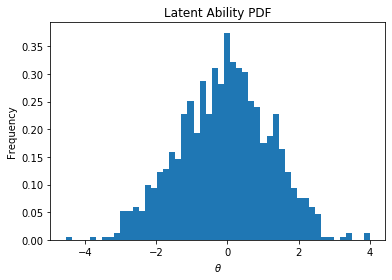

In [12]:
# Verify that student latent abilities are normally distributed. theta_c ~ N(0, invgamma(a_c,b_c))
plt.hist(theta[:, 0], 50, density=True)
plt.xlabel(r'$\theta$')
plt.ylabel('Frequency')
plt.title('Latent Ability PDF')
plt.show()

In [19]:
# Add a collusion group.
leaked_items = np.random.choice(I, int(0.25 * I), replace=False)
cheaters = np.random.choice(P, 40, replace=False)

In [36]:
X[cheaters[:, None], leaked_items] = np.random.binomial(1, p=0.95, size=(cheaters.size, leaked_items.size))

array([[16.40545855,  0.52221775,  0.48356883, ...,  0.42489075,
         0.73882512,  0.91398924],
       [ 0.68522677,  1.20748204,  0.64737313, ...,  0.43149649,
         0.87311094,  0.89930242],
       [ 0.26770999,  0.48969478,  1.81693899, ...,  1.97365301,
         3.19755824,  4.68795333],
       ...,
       [ 1.74157489,  1.82900894,  1.13116398, ...,  4.82071989,
         1.24585469,  0.16715355],
       [ 2.22188211,  0.8262981 ,  3.49518911, ...,  2.64817637,
         1.96613373,  0.52838316],
       [ 2.64598396,  0.14140035,  1.19681962, ...,  0.62783681,
         0.36103299,  0.21890772]])